In [27]:
from tensorflow.keras.datasets.mnist import load_data

In [28]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [29]:
# x_train[4], y_train[4]
x_train[50000], y_train[50000]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
         205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
         254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
           0

3 <class 'numpy.uint8'>


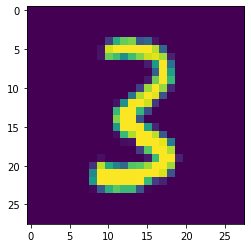

In [30]:
import matplotlib.pyplot as plt

plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

reshape를 통해 차원을 줄여줌

In [31]:
x_train = x_train.reshape(-1,28*28) / 255
x_train.shape

(60000, 784)

In [32]:
x_test = x_test.reshape(-1, 28*28) / 255
x_test.shape

(10000, 784)

In [33]:
y_train[2:10], y_train.shape

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

In [34]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model

In [35]:
import tensorflow as tf

In [36]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,))) # input layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
# 결과값 3개 이상 softmax 사용, 결과 binary --> sigmoid 사용
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output layer

# regression --> loss : mse
# bianry classification --> loss : binary crossentropy
# over 3 classification --> loss : categorical crossentropy(onehot encoding), spars_categorical_crossentropy(onehot encoding X)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

spars_categorical_crossentropy   -->  onehot encoding을 안 해줬을 때<br>
categorical_crossentropy   -->  one hot encoding을 했을 때

In [37]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3255 - acc: 0.9055 - val_loss: 0.1718 - val_acc: 0.9484
Epoch 2/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1432 - acc: 0.9571 - val_loss: 0.1423 - val_acc: 0.9582
Epoch 3/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1021 - acc: 0.9693 - val_loss: 0.1254 - val_acc: 0.9618
Epoch 4/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0765 - acc: 0.9763 - val_loss: 0.1124 - val_acc: 0.9666
Epoch 5/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0631 - acc: 0.9798 - val_loss: 0.1091 - val_acc: 0.9685
Epoch 6/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0504 - acc: 0.9840 - val_loss: 0.1107 - val_acc: 0.9687
Epoch 7/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0402 - acc: 0.9869 - val_loss: 0.1077 - val_acc: 0.9706
Epoch 8/100
1313/1313 [==============================] 

# evaluation

In [38]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

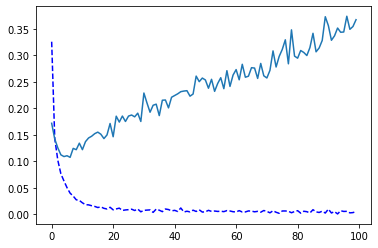

In [39]:
import matplotlib.pyplot as plot

plt.plot(hist.history['loss'], 'b--')
plt.plot(hist.history['val_loss'])
plt.show()

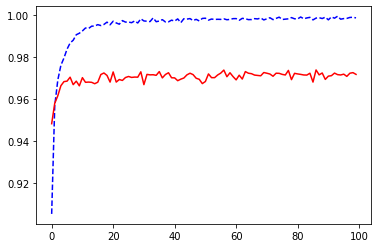

In [40]:
plt.plot(hist.history['acc'], 'b--')
plt.plot(hist.history['val_acc'], 'r')

# service

In [42]:
x_test[30]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [43]:
import numpy as np
np.set_printoptions(precision=8)

pred = model.predict(x_test[30:31])
# model.predict([x_test[30:31]]) 이게 깔끔
pred

array([[0.0000000e+00, 3.2533118e-35, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 4.8223997e-32, 0.0000000e+00, 0.0000000e+00,
        4.4500715e-37, 0.0000000e+00]], dtype=float32)

In [44]:
np.argmax(pred, axis=1)

array([3])

In [41]:
y_test[30]

3

# Save

In [45]:
model.save('./model_save')

INFO:tensorflow:Assets written to: ./model_save/assets


In [46]:
model.save('./model_save01.h5')

In [48]:
model_load = tf.keras.models.load_model('./model_save01.h5')

In [52]:
load_pred = model_load.predict(x_test[30:31])
load_pred, np.argmax(load_pred)

(array([[0.0000000e+00, 3.2533118e-35, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 4.8223997e-32, 0.0000000e+00, 0.0000000e+00,
         4.4500715e-37, 0.0000000e+00]], dtype=float32), 3)

(array([[0.0000000e+00, 3.2533118e-35, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 4.8223997e-32, 0.0000000e+00, 0.0000000e+00,
         4.4500715e-37, 0.0000000e+00]], dtype=float32), 3)